# K-Mean 觀察 : 使用輪廓分析

# [作業目標]
- 試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較

# [作業重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [1]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)
%matplotlib inline

In [2]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500, n_features=2, centers=5, cluster_std=1, center_box=(-10.0, 10.0),
                  shuffle=True, random_state=123)
print('X:\n', X[:10])
print()
print('y:\n', y[:10])
print()
print('unique y:\n', np.unique(y))

X:
 [[ 9.01742889  3.53826763]
 [-0.77872546 -2.58067738]
 [ 9.97648703  4.77979357]
 [ 4.62202905  0.06872601]
 [ 9.56248249  3.54238946]
 [ 4.16506661 -1.05599654]
 [ 0.38179854 -3.96527091]
 [ 8.93545608  3.09158212]
 [ 5.88879505 -6.30225906]
 [ 4.35553035 -5.88262305]]

y:
 [3 4 3 2 3 2 4 3 0 0]

unique y:
 [0 1 2 3 4]


In [3]:
def silhouette_analysis_plot(X):
    for n_clusters in (2, 3, 4, 5, 6, 7, 8,):
        plt.suptitle('Silhouette analysis for KMeans clustering on sample data with n_clusters = {}'.format(n_clusters),
                     fontsize=14, fontweight='bold')
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
        make_silhouette_plot(X, n_clusters, cluster_labels, ax1)
        make_2D_cluster_plot(X, n_clusters, clusterer, cluster_labels, ax2)
    plt.show()

def make_silhouette_plot(X, n_clusters, cluster_labels, ax):
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    print('For n_clusters = {}, the average silhouette_score is {:.3f}'.format(n_clusters, silhouette_avg))

    ax.set_title('The silhouette plot for the various clusters')
    ax.set_xlabel('The silhouette coefficient values')
    ax.set_ylabel('Cluster label')
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax.axvline(x=silhouette_avg, color='red', linestyle='--')

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        ith_cluster_size = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + ith_cluster_size
        y_range = np.arange(y_lower, y_upper)
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(y_range, 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))
        y_lower = y_upper + 10

def make_2D_cluster_plot(X, n_clusters, clusterer, cluster_labels, ax):
    centers = clusterer.cluster_centers_
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    ax.set_title('The visualization of the clustered data')
    ax.set_xlabel('Feature space for the 1st feature')
    ax.set_ylabel('Feature space for the 2nd feature')
    ax.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    ax.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax.scatter(c[0], c[1], marker=f'${i}$', alpha=1, s=50, edgecolor='k')

For n_clusters = 2, the average silhouette_score is 0.503
For n_clusters = 3, the average silhouette_score is 0.611
For n_clusters = 4, the average silhouette_score is 0.627
For n_clusters = 5, the average silhouette_score is 0.612
For n_clusters = 6, the average silhouette_score is 0.550
For n_clusters = 7, the average silhouette_score is 0.470
For n_clusters = 8, the average silhouette_score is 0.423


<Figure size 432x288 with 0 Axes>

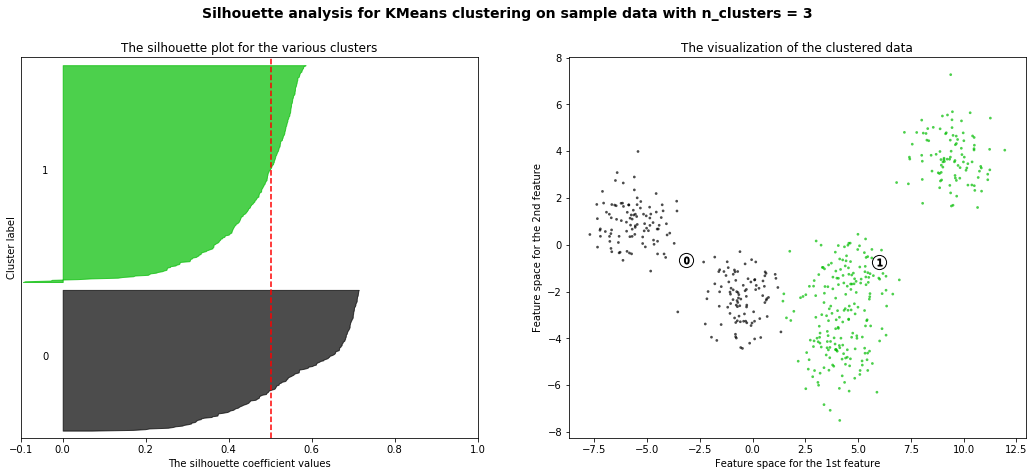

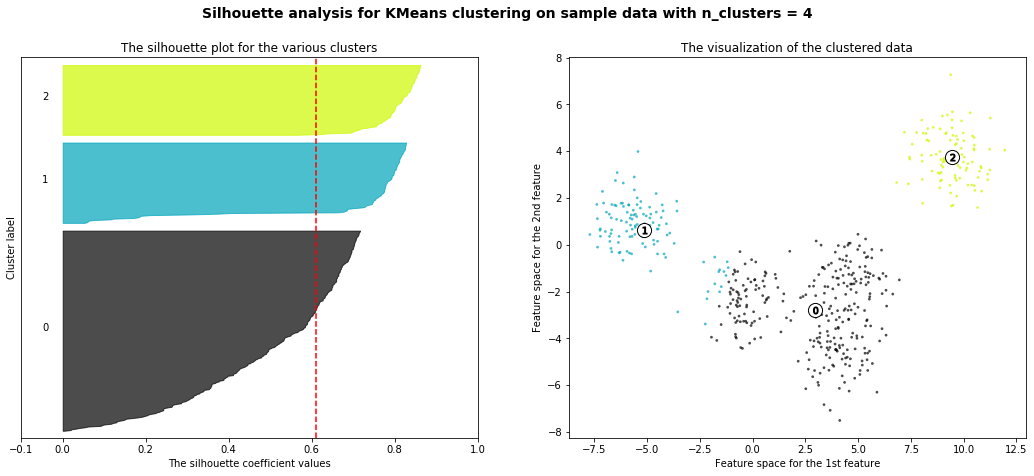

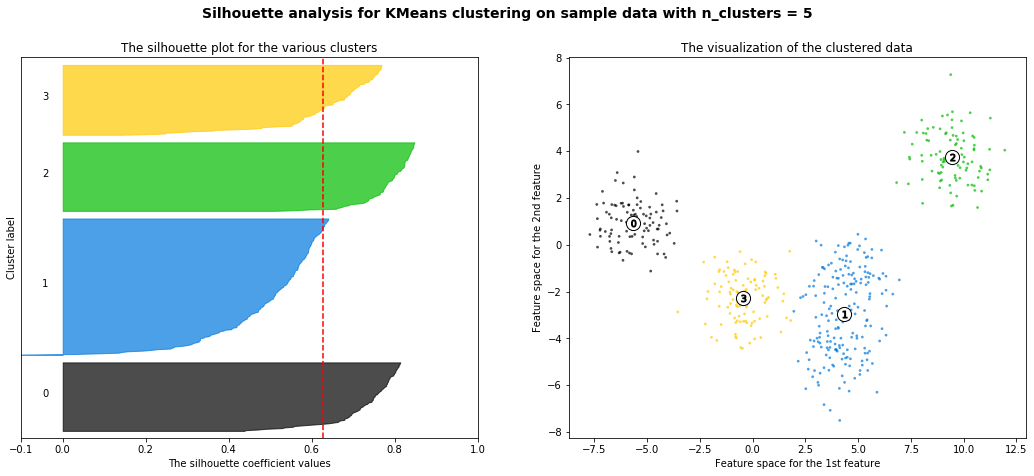

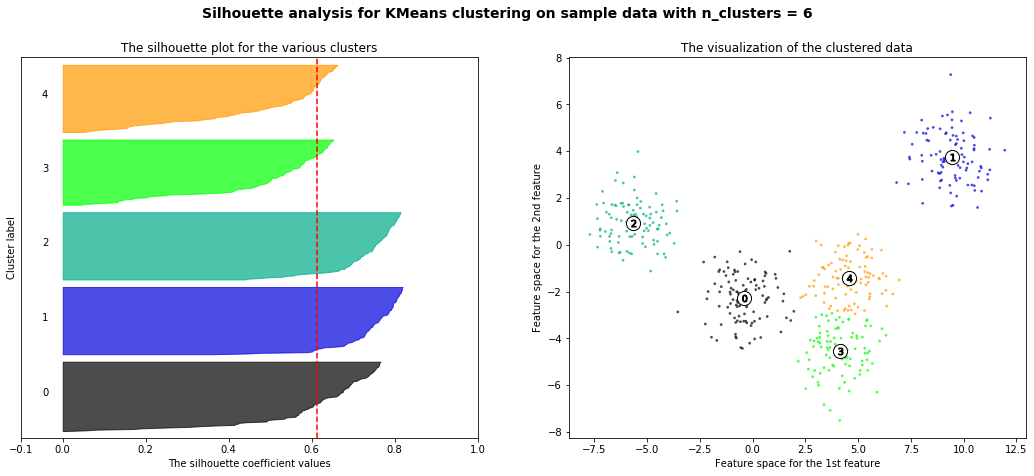

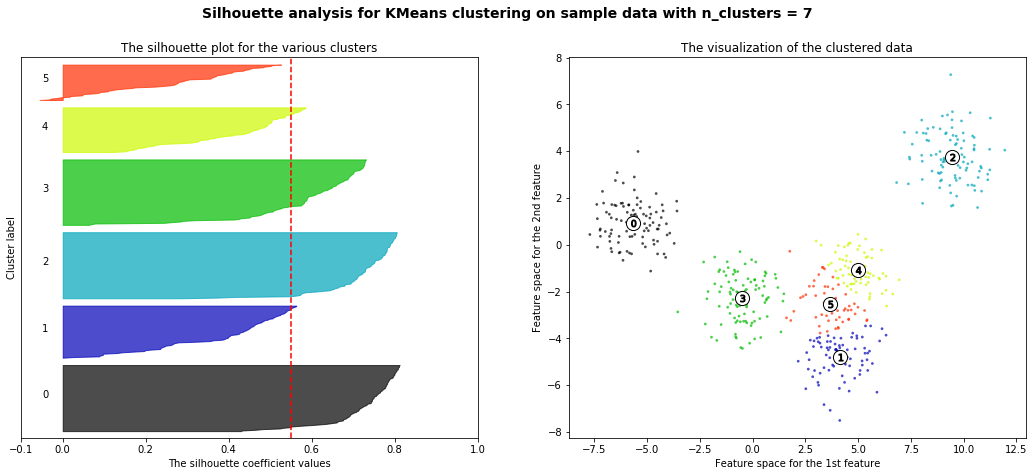

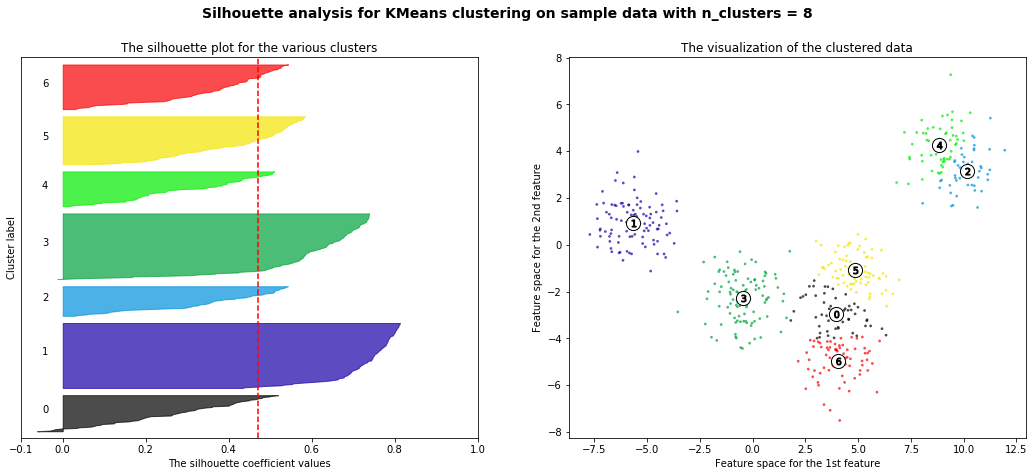

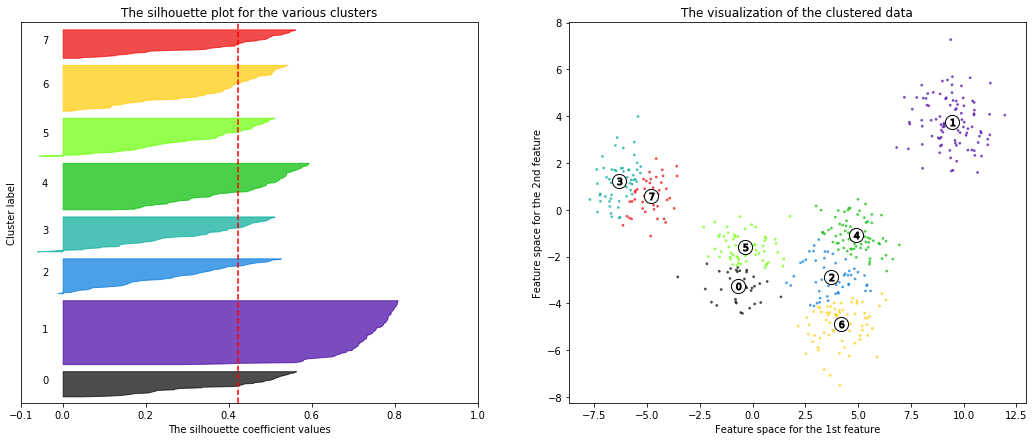

In [4]:
silhouette_analysis_plot(X)